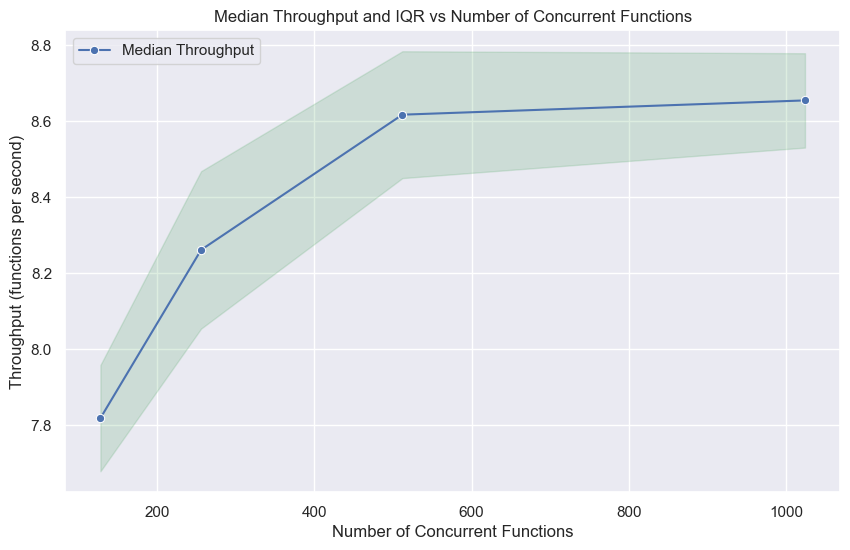

In [16]:
# TODO median and plotting the variance of the data 
# MPS write to Christine about the GC
# HPK check how to build


import json
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

file_dir = "results_throughput/"
#  each file is name like throughput_pytorch_concurrent_#_globus-torch.json where # is the number of concurrent functions
files = ["throughput_pytorch_concurrent_128_globus-torch.json", "throughput_pytorch_concurrent_256_globus-torch.json", "throughput_pytorch_concurrent_512_globus-torch.json", "throughput_pytorch_concurrent_1024_globus-torch.json"]

data_list = []

for file in files:
    with open(file_dir + file, 'r') as f:
        data = json.load(f)
        concurrent_functions = int(file.split('_')[3])
        throughputs = [data[key]['throughput'] for key in data]
        median_throughput = np.median(throughputs)
        q75, q25 = np.percentile(throughputs, [75, 25])
        iqr = q75 - q25
        
        data_list.append({
            'Concurrent Functions': concurrent_functions,
            'Median Throughput': median_throughput,
            'IQR': iqr
        })

# Convert data_list to a DataFrame
df = pd.DataFrame(data_list)

# Create a Seaborn plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

# Plot the median throughput
sns.lineplot(data=df, x='Concurrent Functions', y='Median Throughput', marker='o', label='Median Throughput')

# Add the fill between for IQR
plt.fill_between(df['Concurrent Functions'], 
                 df['Median Throughput'] - df['IQR'] / 2, 
                 df['Median Throughput'] + df['IQR'] / 2, 
                 color='g', alpha=0.2)

plt.xlabel('Number of Concurrent Functions')
plt.ylabel('Throughput (functions per second)')
plt.title('Median Throughput and IQR vs Number of Concurrent Functions')
plt.legend()
plt.show()